# Support Vector Regressor Implementation

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [5]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [6]:
X

array([[-0.68712367,  0.23652841],
       [-0.34843824, -1.34585218],
       [ 0.4170026 ,  0.35524823],
       ...,
       [ 0.71730043,  0.49132691],
       [ 1.94359075, -0.68306108],
       [-0.05345631,  1.5783863 ]])

In [7]:
y

array([-4.06740446e+01, -9.71326196e+01,  5.27569553e+01,  6.73489155e+01,
        4.88921606e+01,  1.07999114e+02, -3.61710821e+00, -4.24593222e+01,
        9.86093236e+01,  2.71189084e+01, -6.83523941e+01,  1.20964297e+02,
        2.53241720e+01,  7.18979753e+00,  2.57188007e+01, -8.72387103e+01,
       -1.94339048e+02,  1.06695293e+02, -1.16064654e+02, -1.30390623e+02,
       -2.11635684e+02, -3.24879704e+01, -1.08057538e+02,  1.02964478e+01,
       -1.74313468e+02, -7.22121301e+01,  2.02715650e+01, -3.46638996e+01,
       -1.53519013e+02, -1.73830370e+01, -1.10012485e+02, -1.37504130e+02,
       -3.71396192e+01, -9.69117053e+01,  2.45178721e+02, -5.73882242e+01,
        6.01938018e+01, -3.68231531e+01,  2.30447250e+02, -2.42903414e+01,
       -1.52561015e+01,  1.21556530e+01,  2.17918212e+01, -1.69834927e+02,
        3.47951345e+01, -4.71968489e+01,  7.55377646e+00, -3.45598010e+01,
        4.14122267e+01, -1.63864292e+01, -1.46269140e+00,  2.18375368e+01,
        6.23812277e+01,  

In [ ]:
pd.DataFrame(X)[0]

<AxesSubplot:xlabel='0', ylabel='1'>

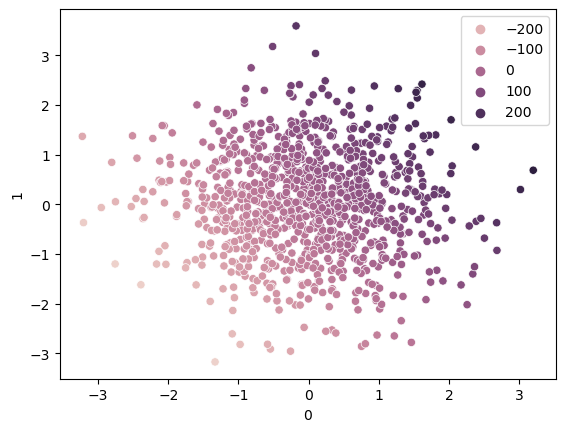

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [11]:
from sklearn.svm import SVR

In [12]:
svr=SVR(kernel='linear')

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[74.77820417, 52.74704787]])

In [15]:
## Prediction
y_pred=svr.predict(X_test)

In [17]:
y_pred

array([  55.48597698,   97.66322359,  -20.97875313,   20.87172759,
        -83.28657029,  140.45815524,  -70.72607294,  136.16029325,
        120.08713408,  105.8458469 ,   24.26293089,  -25.25436171,
       -115.06084514,    1.12019716,  -32.08464446,  -19.25565858,
        157.29549544,  -52.68661254,   56.66099426,  -55.30458841,
         24.69535389,  -33.66011887,  136.49946492,   65.97224045,
         25.52897237, -194.6558915 ,  -60.26599443,  195.39023522,
        -44.46314362, -134.05924099, -105.80856335,   62.69979342,
        -25.49981178,  -43.36474849,    1.55129139,   97.3258403 ,
        -44.99306148,  -48.76568819,   25.96259887,  -57.95066811,
        -29.44466067,  140.65559285,   72.35301548,  -55.35065047,
        -41.27027473, -142.27723573,   95.51332256,   56.64232542,
       -113.82240551,  183.86029824,  -34.19130188, -103.97206749,
        100.68929783,  -54.48603325,  -65.96714789,  192.95145667,
       -146.17703945,   10.26361663,   81.56419369, -108.82251

In [18]:
from sklearn.metrics import r2_score

In [19]:
print(r2_score(y_test,y_pred))

0.9990285526063875


## Hyperparametere Tuning with SVR

In [20]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [21]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.760 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.737 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.760 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, e

[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.999 total t

[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.999 total time=   0.0s
[C

[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.9s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.7s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.6s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.999 total time=   0.8s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.9s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.6s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.999 total time=   0.8s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [24]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.999078484932493
